# Predicción de precios de automóviles

Utilizando el Modelo de Regresión Lineal Múltiple se predecirá el valor del precio de distintos automóviles en base a sus distintas características.

Se cuenta con una base de datos que cuenta con las siguientes entradas de cada vehículo:

<ul>
    <li>Marca (Brand)</li>
    <li>Precio (Price) ------------ Variable a predecir </li>
    <li>Tipo (Body)</li>
    <li>Millas recorridas (Mileage)</li>
    <li>Motor (EngineV)</li>
    <li>Tipo de motor (Engine Type)</li>
    <li>Año (Year)</li>
    <li>Modelo (Model)</li>    
</ul>

## Limpieza de los datos

### Importando librerías relevantes

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

### Cargando los datos primarios

In [2]:
datos_primarios = pd.read_csv('vehiculos.csv')

datos_primarios.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocesamiento

### Explorando las estadisticas descriptivas de las variables

In [3]:
datos_primarios.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determinando las variables de interés

In [4]:
# En este caso nos deshacemos de la variable "modelo de vehículo"
# por considerarse menos relevante que, por ejemplo, la marca
datos = datos_primarios.drop(['Model'],axis=1)

datos.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Lidiando con valores faltantes

In [5]:
# Observamos cuántos valores faltan por cada columna
datos.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [6]:
#En este caso eliminamos todas las filas con valores faltantes, que en este caso es menor al 5% del total de filas
datos_sin_valores_faltantes = datos.dropna(axis=0)

In [7]:
# Se chequean las estadisticas descriptivas sin valores faltantes
datos_sin_valores_faltantes.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Explorando las curvas de densidad

C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

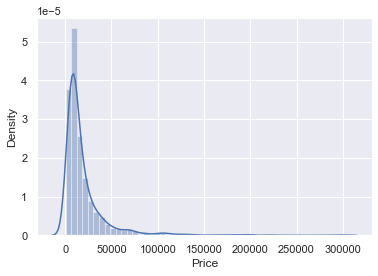

In [8]:
# Al observar los percentiles de precio, podemos notar que el valor máximo esta muy alejado de la media
# Por esta razon, se decide graficar la curva de densidad de los precios
sns.distplot(datos_sin_valores_faltantes['Price'])

### Lidiando con valores aislados

In [9]:
# Claramente se puede apreciar que existen valores aislados que pueden afectar la aplicacion de una regresión lineal.
# para lidiar con el problema, se puede remover el 1% de los valores problemáticos que se situan en los valores más altos

q = datos_sin_valores_faltantes['Price'].quantile(0.99)
datos_1 = datos_sin_valores_faltantes[datos_sin_valores_faltantes['Price']<q]
#Ahora tenemos una tabla sin el 1% de valores problemáticos de precios

datos_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

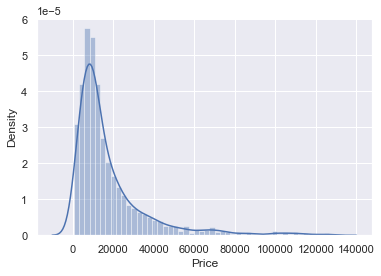

In [10]:
# Los datos se siguen distribuyendo de la misma forma, pero esta vez con menos valores aislados
sns.distplot(datos_1['Price'])

C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

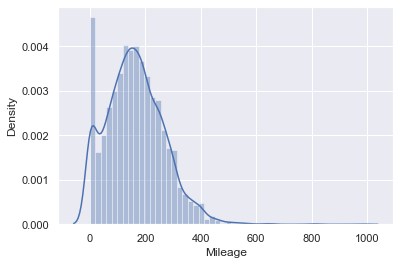

In [11]:
# Podemos hacer lo mismo para otros valores numericos con problemas similares
sns.distplot(datos_sin_valores_faltantes['Mileage'])

In [12]:
q = datos_1['Mileage'].quantile(0.99)
datos_2 = datos_1[datos_1['Mileage']<q]

C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

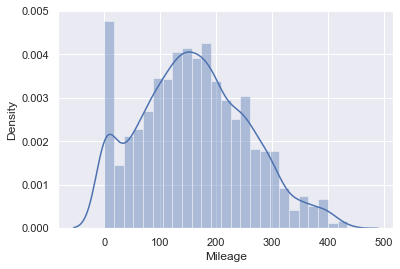

In [13]:
# Ahora tenemos un gráfico con menor cantidad de valores aislados
sns.distplot(datos_2['Mileage'])

C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

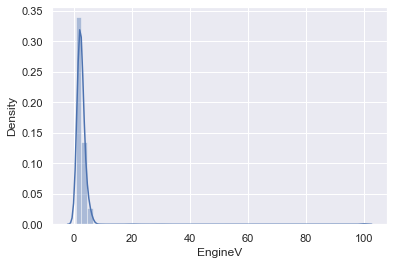

In [14]:
# Hacemos lo mismo para la variable EngineV
sns.distplot(datos_sin_valores_faltantes['EngineV'])

In [15]:
# Para el caso de la variable EngineV se puede apreciar que existen valores erroneos, pues el maximo valor es 99l
# En general, el dominio de la variable EngineV nunca excede los 6.5l, asi, eliminamos los valores superiores a esta cota
datos_3 = datos_2[datos_2['EngineV']<6.5]

C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

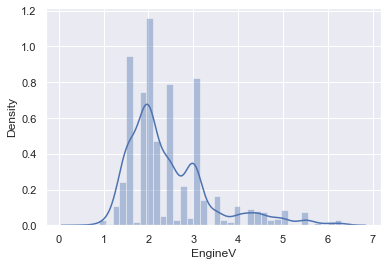

In [16]:
sns.distplot(datos_3['EngineV'])

C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

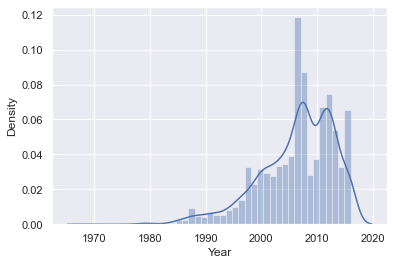

In [17]:
# Finalmente para la variable Years la situacion es similar a Price y Mileage
# los valores aislados estan situados en los valores mas bajos
sns.distplot(datos_sin_valores_faltantes['Year'])

In [18]:
# Removemos el 1% de estos valores
q = datos_3['Year'].quantile(0.01)
datos_4 = datos_3[datos_3['Year']>q]

C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

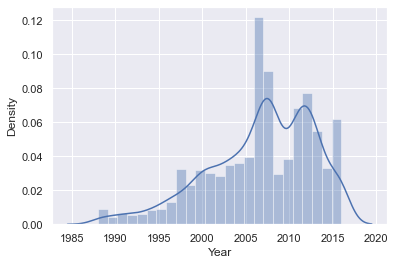

In [19]:
# observamos el nuevo resultado
sns.distplot(datos_4['Year'])

In [20]:
# Ya que hemos removido observaciones, los indices de filas originales de dichas observaciones tambien se eliminan
# Si por ejemplo eliminamos las observaciones 2 y 3, los indices de cada fila serán de la forma 0, 1, 4, 5, ...
# Por lo tanto reseteamos los indices de cada fila de tal forma de que se muestren sin saltarse numeros, es decir, 0,1,2,3,4, ...
datos_limpios = datos_4.reset_index(drop=True)

In [21]:
# A esta altura ya nos hemos deshecho de los valores problematicos y aun conservamos una cantidad considerable de muestras
datos_limpios.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Chequeando las asunciones de la regresión lineal

### Linealidad

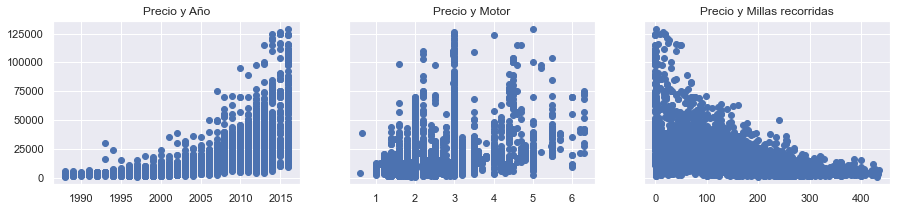

In [22]:
# graficamos como se comporta el precio respecto a las variables Year, EngineV y Mileage
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(datos_limpios['Year'],datos_limpios['Price'])
ax1.set_title('Precio y Año')
ax2.scatter(datos_limpios['EngineV'],datos_limpios['Price'])
ax2.set_title('Precio y Motor')
ax3.scatter(datos_limpios['Mileage'],datos_limpios['Price'])
ax3.set_title('Precio y Millas recorridas')

plt.show()

C:\Users\acust\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

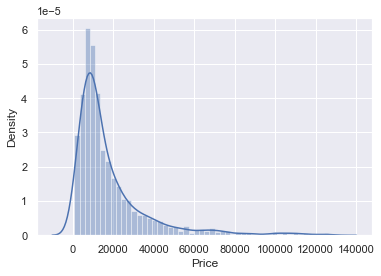

In [23]:
# Como puede apreciarse, los distintos gráficos muestran que el Precio se distribuye exponencialmente
# Podemos utilizar la transformación logaritmica para este caso.
sns.distplot(datos_limpios['Price'])

In [24]:
log_precio = np.log(datos_limpios['Price'])

# Agregamos la columna del logaritmo del precio a nuestra tabla de datos
datos_limpios['log_price'] = log_precio
datos_limpios

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


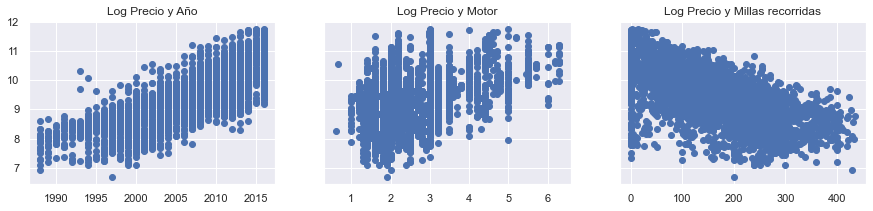

In [25]:
# Chequeamos los gráficos nuevamente, esta vez con el logaritmo del precio
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(datos_limpios['Year'],datos_limpios['log_price'])
ax1.set_title('Log Precio y Año')
ax2.scatter(datos_limpios['EngineV'],datos_limpios['log_price'])
ax2.set_title('Log Precio y Motor')
ax3.scatter(datos_limpios['Mileage'],datos_limpios['log_price'])
ax3.set_title('Log Precio y Millas recorridas')


plt.show()

# Los datos ahora muestran un comportamiento lineal

In [26]:
# Como usaremos el logaritmo del precio, nos deshacemos de la columna "Price" de la tabla.
datos_limpios = datos_limpios.drop(['Price'],axis=1)

### Multicolinealidad

In [27]:
# Para medir multicolinealidad de las variables utilizamos el factor de inflación de la varianza
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = datos_limpios[['Mileage','Year','EngineV']]

# Creamos una dataframe que nos permite apreciar de mejor manera los respectivos VIF's
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Variables"] = variables.columns

In [28]:
# Observamos los resultados
vif

,VIF,Variables
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [29]:
# Para este caso, como la variable Year tiene el VIF mas alto, se remueve de la tabla de datos
# Esto tambien hará que el resto de VIF's de las variables restantes disminuya
datos_sin_multicolinealidad = datos_limpios.drop(['Year'],axis=1)

## Creando variables binarias

In [30]:
# Para introducir datos categoricos, creamos variables binarias.
datos_con_variables_binarias = pd.get_dummies(datos_sin_multicolinealidad, drop_first=True)

In [31]:
# Vemos el resultado
datos_con_variables_binarias.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Reordenando la tabla

In [32]:
datos_con_variables_binarias.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [33]:
columnas = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [34]:
datos_preprocesados = datos_con_variables_binarias[columnas]
datos_preprocesados.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Exportamos los datos a un archivo csv para aplicarle un modelo de regresión lineal

In [35]:
datos_preprocesados.to_csv('Datos preprocesados.csv')